
<img src='ted-logo.png'/>

# TED Talks

### Intro
Hi there, this is another project for TED Talks Analysis. You can find the dataset [HERE](https://www.kaggle.com/rounakbanik/ted-talks/data), so you can experiment on your own!

#### What is TED? * 
TED (Technology, Entertainment, Design) is a media organization which posts talks online for free distribution, under the slogan "ideas worth spreading". TED was founded in February 1984 as a conference, which has been held annually since 1990. TED's early emphasis was technology and design, consistent with its Silicon Valley origins, but it has since broadened its focus to include talks on many scientific, cultural, and academic topics.

*****[ *source: Wikipedia *]

##### Data Context

The dataset contain information about all audio-video recordings of TED Talks uploaded to the official TED.com website until September 21st, 2017. The TED main dataset contains information about all talks including number of views, number of comments, descriptions, speakers and titles. The TED transcripts dataset contains the transcripts for all talks available on TED.com.

#### What this analysis is all about?
It is an attempt to find all the insights from the "TEData". Analyze the features independently and at the same time find relationships between them. Speakers, events , dates and titles are only a taste from data.


"Tables & plots" driven story telling... so let's start!

In [2]:
# import basic libraries
import numpy as np
import pandas as pd

# load data csv
df = pd.read_csv('ted_main.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


In [3]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


We will keep url links out of dataframe and drop a few columns to shorten the size. As a result of "main_speaker" and "title" columns, "name" column will be dropped. Related talks as well.

In [4]:
# keep url in separate series
urls = df.url
urls[:2]

# drop some columns
df = df.drop(['name', 'url', 'related_talks'], axis = 1)

#### Missing values
If there are any null values we will handle them in order not to have any issues. Usually if the total number of nans is smaller than 5% of data's shape, I drop these rows.

In [5]:
# check for missing values 
# isNull() -> isna() Pandas 0.22
df.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
num_speaker           0
published_date        0
ratings               0
speaker_occupation    6
tags                  0
title                 0
views                 0
dtype: int64

only 6 nulls in 2550 rows -- DELETE

In [6]:
# drop NAs and reset index
df = df.dropna()
df = df.reset_index(drop = True)

###### Seconds to minutes conversion
It's easier to understand, based on our daily habits, the duration of an event in minutes.

In [7]:
# convert sec to mins
df['duration'] = df['duration'].apply(lambda x: round(x/60.0, 1))
df['duration'][:2]

0    19.4
1    16.3
Name: duration, dtype: float64

### EDA begins

From ratings of talks to main speakers and from comments to views, tables, plots and stats help us to understand the insights. One step at a time, Exploratory Data Analysis shall begin!

In [8]:
# RATINGS #
print(df.ratings[:3],"\n",df.ratings[-3:])

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
Name: ratings, dtype: object 
 2541    [{'id': 1, 'name': 'Beautiful', 'count': 14}, ...
2542    [{'id': 11, 'name': 'Longwinded', 'count': 3},...
2543    [{'id': 21, 'name': 'Unconvincing', 'count': 2...
Name: ratings, dtype: object


**"ratings"** column is a list of dictionaries. Every single dictionary has 3 keys and 3 values: 1. 'id' of the rating, 2. 'name' of the rating, 3. 'count' per rating. These ratings come from 'TED talks' viewers.

In [9]:
# RATINGS #
from ast import literal_eval

# sort ratings by count
df.ratings = df['ratings'].apply(lambda x: literal_eval(x))
df.ratings = df.ratings.apply(lambda x: sorted(x, key=lambda k: k['count'], reverse=True))

In [10]:
# we need name...
df['top_rate'] = df.ratings.apply(lambda x: x[0]['name'])

# ...and count
df['top_rate_count'] = df.ratings.apply(lambda x: x[0]['count'])

# top rates
print('Top ratings')
df.top_rate.value_counts()

Top ratings


Inspiring       877
Informative     724
Fascinating     261
Funny           163
Beautiful       153
Ingenious       102
Courageous       84
Persuasive       83
Jaw-dropping     53
Unconvincing     23
Longwinded        8
OK                7
Obnoxious         4
Confusing         2
Name: top_rate, dtype: int64

### Top 5 ratings for different rate names

Inspiring, funny and confusing are few rates from the list.

In [11]:
for i in ['Inspiring','Informative','Funny','Ingenious','Jaw-dropping','Unconvincing','Confusing']:
    print("\n|",i,"\n")
    print(df.loc[df.top_rate == i,
                 ['top_rate','top_rate_count','title','main_speaker']].sort_values('top_rate_count', ascending = False)[:5])



| Inspiring 

       top_rate  top_rate_count                                     title  \
0     Inspiring           24924               Do schools kill creativity?   
677   Inspiring           21564          How great leaders inspire action   
837   Inspiring           21444                The power of vulnerability   
1343  Inspiring           21210  Your body language may shape who you are   
1030  Inspiring           17290                How to live before you die   

      main_speaker  
0     Ken Robinson  
677    Simon Sinek  
837    Brené Brown  
1343     Amy Cuddy  
1030    Steve Jobs  

| Informative 

         top_rate  top_rate_count                                       title  \
4     Informative            5433             The best stats you've ever seen   
1569  Informative            5248              How to make stress your friend   
1772  Informative            5167  How to speak so that people want to listen   
2134  Informative            3599       10 ways to have

In [12]:
# import visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt

### Tags: The Themes associated with the talks

In [13]:
# TAGS
df.tags = df.tags.apply(lambda x: literal_eval(x))

# collect tags in a list
tags = []
for i in df.tags:
    for j in i:
        tags.append(j)

# Counter: tool for most frequent elements in a list
from collections import Counter

# Top 20 tags
count_tags = Counter(tags).most_common(20)
count_tags=dict(count_tags)

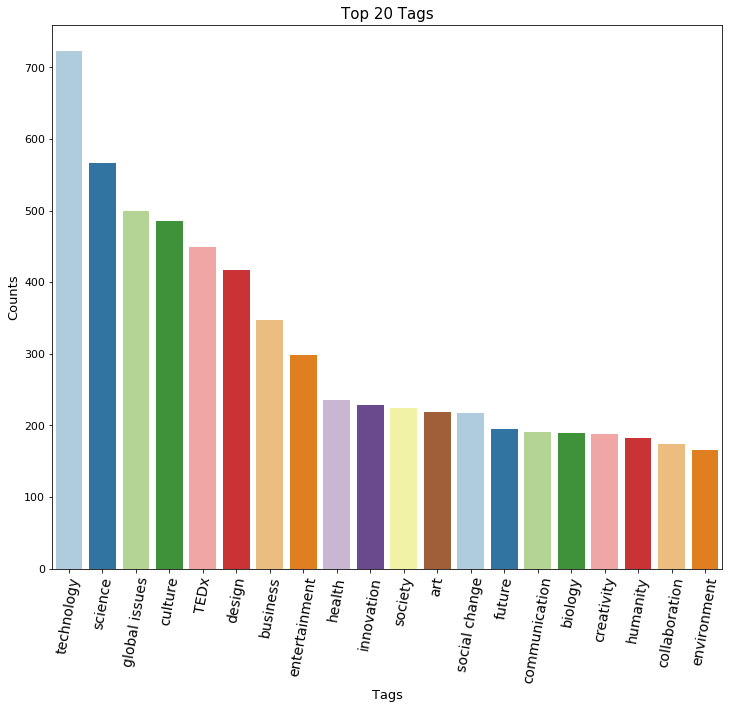

In [14]:
# FUNCTION FOR BARPLOTS

def barplot(x, y, xlabel, ylabel, title, palette):
    fig,ax = plt.subplots(figsize=(12, 10))
    sns.barplot(x, y, palette = palette)
    plt.xticks(rotation = 80, fontsize =14)
    plt.xlabel(xlabel, fontsize = 13)
    plt.yticks(fontsize = 11)
    plt.ylabel(ylabel, fontsize = 13)
    plt.title(title, fontsize = 15)
    return(plt.show())

barplot(list(count_tags.keys()), list(count_tags.values()), 'Tags', 'Counts', 'Top 20 Tags', 'Paired')


As expected **technology** is the most common theme of TED talks. Remarkable themes are **science** and **culture** too! On the other hand, **environment** is not so popular theme! This ain't a global issue though ?

### Unix timestamp to 'human' date
It's easier to manipulate dates using datetime

In [15]:
### Manipulate DATES
# convert unix time to timestamp for film date and publish date

from datetime import datetime

# convert film_date column
df.film_date = df.film_date.apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
df.film_date = df.film_date.apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

# convert published_date column
df.published_date = df.published_date.apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
df.published_date = df.published_date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

We see two different columns with dates. Film date and publish date. We have to examine if there are any errors with these dates. All I want to say is we gotta be sure that **publish date can't be earlier than film date**!

In [16]:
# Create a new column with "date difference" in days
df['date_diff'] = df.published_date - df.film_date
df['date_diff'] = df.date_diff.apply(lambda x: x.days)

df[['film_date','published_date','date_diff']][:5]

,film_date,published_date,date_diff
0,2006-02-25,2006-06-27,122
1,2006-02-25,2006-06-27,122
2,2006-02-24,2006-06-27,123
3,2006-02-26,2006-06-27,121
4,2006-02-22,2006-06-27,125


In [17]:
# check for negative remainder
df.loc[df.date_diff < 0,['film_date','published_date','date_diff']]

,film_date,published_date,date_diff
323,2009-10-01,2008-10-31,-335
324,2009-10-01,2008-10-31,-335
325,2009-10-01,2008-10-31,-335
326,2009-10-14,2008-10-31,-348
327,2009-10-01,2008-10-31,-335
328,2009-10-14,2008-10-31,-348
614,2010-02-20,2010-02-11,-9
857,2011-09-23,2011-01-26,-240
1490,2013-05-07,2013-05-03,-4
1842,2014-10-22,2014-10-21,-1


*Boom!* What is going on here? For one thing I could be suspicious of. Human Error! 

Let's take a look at our results. For index from 323 to 328 I believe that '2008' must be '2009' in published_date column. We swap year value for 614, 1490 and 1842. Finaly, we change month for 857.

In [18]:
# Handle dates with negative diff.

# SWAP values
df.loc[df.index == 614, ['film_date', 'published_date']] = df.loc[df.index == 614, ['published_date', 'film_date']].values
df.loc[df.index == 1490, ['film_date', 'published_date']] = df.loc[df.index == 1490, ['published_date', 'film_date']].values
df.loc[df.index == 1842, ['film_date', 'published_date']] = df.loc[df.index == 1842, ['published_date', 'film_date']].values

# change month in publish date
df['published_date'][857] = df['published_date'][857].replace(month = 9)

# change year
for i in range(323,329):
    df['published_date'][i] = df['published_date'][i].replace(year = 2009)


/Users/stephanosarampatzes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/stephanosarampatzes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [19]:
# check for errors

df['date_diff'] = df.published_date - df.film_date
df['date_diff'] = df.date_diff.apply(lambda x: x.days)

print(df.loc[df.date_diff < 0,['film_date','published_date','date_diff']])


Empty DataFrame
Columns: [film_date, published_date, date_diff]
Index: []


Done!

**Next one** is total views per year. There are two plots based on film date and publish date.

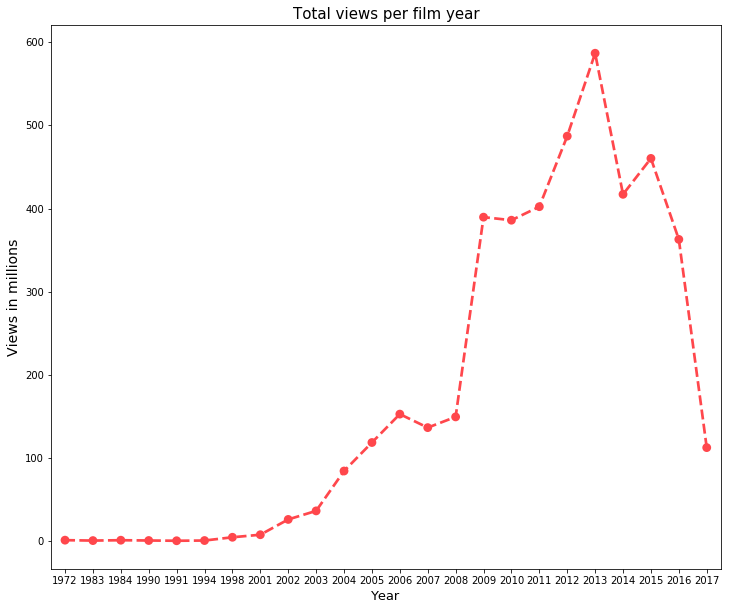

In [20]:
# FUNCTION for jointplots

def pointplot(x, y, xlabel, ylabel, title, color):
    fig,ax = plt.subplots(figsize = (12,10))
    sns.pointplot(x, y, color = color, linestyles="--")
    plt.xlabel(xlabel, fontsize = 13)
    plt.ylabel(ylabel, fontsize = 14)
    plt.title(title, fontsize = 15)
    return(plt.show())

# film date - views
df['f_year'] = df['film_date'].apply(lambda x: x.year)
flm_views = df[['f_year','views']].groupby('f_year').sum().apply(lambda x: round(x/1000000, 2)).reset_index()

# plot
pointplot(flm_views.f_year, flm_views.views, 'Year', 'Views in millions', 'Total views per film year', '#ff474c')

Hmmm, wait a minute! We got 2 dates before 1984. According to [Wikipedia]('https://en.wikipedia.org/wiki/TED_(conference)') *TED was founded in February 1984[5] as a conference, which has been held annually since 1990. [...]*. So, what happened before 1984? Let's see:

In [21]:
df.loc[df.f_year < 1984]

,comments,description,duration,event,film_date,languages,main_speaker,num_speaker,published_date,ratings,speaker_occupation,tags,title,views,top_rate,top_rate_count,date_diff,f_year
629,146,"In this archival footage from BBC TV, celebrat...",65.9,BBC TV,1983-07-08,0,Richard Feynman,1,2010-03-03,"[{'id': 22, 'name': 'Fascinating', 'count': 36...",Physicist,"[astronomy, physics, science]",Physics is fun to imagine,521974,Fascinating,362,9735,1983
686,373,"In this rare clip from 1972, legendary psychia...",4.4,Toronto Youth Corps,1972-05-14,0,Viktor Frankl,1,2010-05-14,"[{'id': 10, 'name': 'Inspiring', 'count': 1673...","Psychiatrist, neurologist, author","[humanity, mind, peace, psychology, war]",Why believe in others,1028630,Inspiring,1673,13879,1972


In **1983** [Richard Feynman](https://en.wikipedia.org/wiki/Richard_Feynman), a Nobel awarded Physist, appeared on **BBC TV**. A decade before Feynman, in 1972, [Viktor Frankl](https://en.wikipedia.org/wiki/Viktor_Frankl) (Neurologist, psychiatrist) delivered an inspiring talk about peace & war. Although, these two talks are not in the TED conference events, it was decided to include films in TED Talks web site's video section.

In [22]:
# total views from talks per year

print('Total views per year:')
flm_views.sort_values('views', ascending = False)[:10]


Total views per year:


,f_year,views
19,2013,586.87
18,2012,487.13
21,2015,460.34
20,2014,417.14
17,2011,402.26
15,2009,389.66
16,2010,385.99
22,2016,362.91
12,2006,152.69
14,2008,149.35


2013 was the most successful year according to views. Let's if that happens and for publish dates. Worth of mention is that probably there are videos that published a few months later than the day they'd been filmed. Maybe a talk that took place in December or November could be published in the new year. This is something that effects the sum of views.

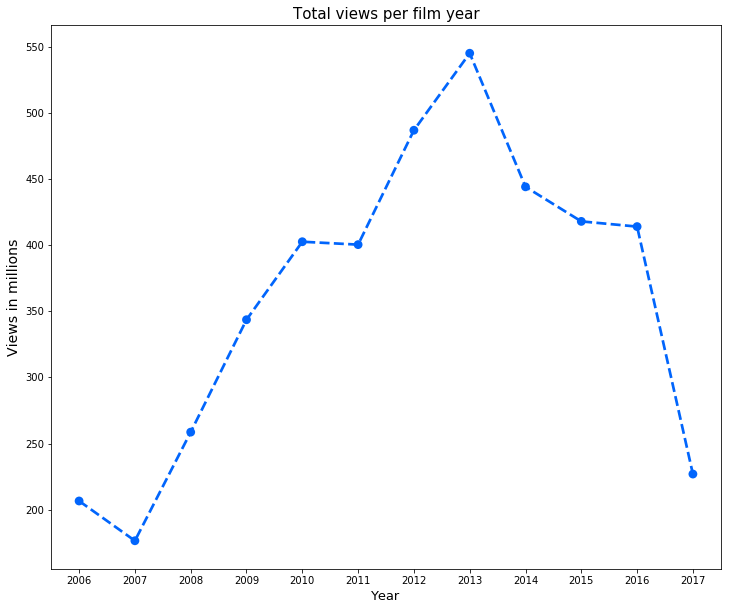

In [23]:
# pubplished date - views

df['p_year'] = df['published_date'].apply(lambda x: x.year)
pub_views = df[['p_year','views']].groupby('p_year').sum().apply(lambda x: round(x/1000000, 2)).reset_index()

# plot
pointplot(pub_views.p_year, pub_views.views, 'Year', 'Views in millions', 'Total views per film year', '#0165fc')

Here 2013 is top year on views!

In [24]:
pub_views.sort_values('views', ascending = False)[:5]

,p_year,views
7,2013,545.29
6,2012,487.03
8,2014,444.23
9,2015,418.08
10,2016,414.14


In [25]:
# biggest number of talks per day since day 1
df.film_date.value_counts()[:5]

2017-04-24    64
2007-03-03    54
2009-02-06    32
2011-03-02    30
2009-02-05    30
Name: film_date, dtype: int64

Spring is the period of time to talk to TED if you want to...

In [26]:
# year with biggest number of talks / plot below
df.f_year.value_counts()[:10]

2013    269
2011    269
2010    267
2012    265
2016    246
2015    239
2014    235
2009    232
2007    114
2017     98
Name: f_year, dtype: int64

In [27]:
# top tags by year
df[['f_year','tags']].groupby('f_year').agg('max')[-15:]

,tags
f_year,
2003,"[philanthropy, philosophy, writing]"
2004,"[health, health care, medicine, science]"
2005,"[government, law, philosophy, politics]"
2006,"[global issues, illness, medicine, science, te..."
2007,"[environment, food, green, obesity, sustainabi..."
2008,"[physics, science, technology]"
2009,"[live music, music, performance]"
2010,"[mission blue, oceans, science, technology]"
2011,"[philosophy, physics, science]"


In [28]:
# year with biggest number of publishments
df.p_year.value_counts()[:7]

2012    303
2011    261
2010    257
2013    244
2016    243
2014    239
2009    228
Name: p_year, dtype: int64

Quite usefull tables!

And a plot below:

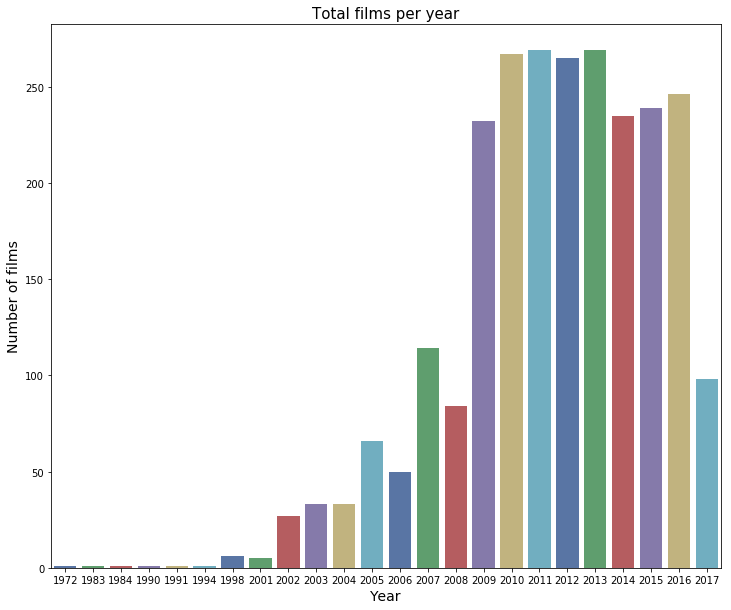

In [29]:
# films per year

fig,ax = plt.subplots(figsize = (12,10))
sns.countplot(df.f_year, palette='deep')
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of films', fontsize = 14)
plt.title('Total films per year', fontsize = 15)
plt.show()

### Views vs Comments & Views vs Duration

Most of times comments come with views. There is a relationship between these two values. Sometimes users are abhorred by long videos duration! Views, comments, and duration are numeric values... so let's examine their **correlation**!

In [30]:
# correlation
df[['views','comments','duration']].corr()

,views,comments,duration
views,1.000000,0.530897,0.048454
comments,0.530897,1.000000,0.140605
duration,0.048454,0.140605,1.000000


To be honest there is a not so big correlation between views and comments and a 'tiny' correlation between views and duration. I believe that if the talk is inspiring, informative etc. it is worthing every single minute!

/Users/stephanosarampatzes/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


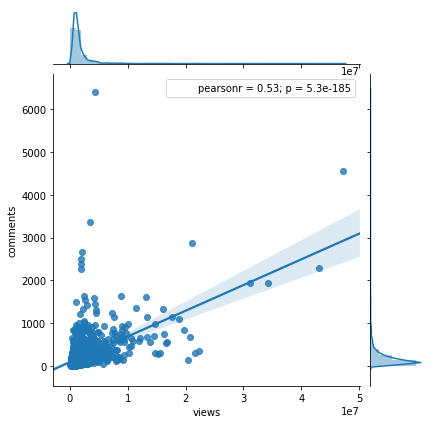

In [31]:
# views - comments
import warnings
sns.jointplot(df.views, df.comments, kind = 'reg')
plt.show()

If we had more data points near the blue line, then the correlation would be bigger.

/Users/stephanosarampatzes/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


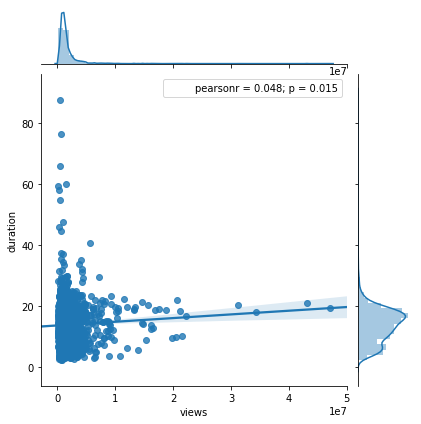

In [32]:
# views - duration
sns.jointplot(df.views, df.duration, kind = 'reg')
plt.show()

### The "Top 10" Section

In [33]:
# TOP TEN

# most viewed
df[['views','main_speaker','title','languages','comments']].sort_values('views', ascending = False)[:10]

,views,main_speaker,title,languages,comments
0,47227110,Ken Robinson,Do schools kill creativity?,60,4553
1343,43155405,Amy Cuddy,Your body language may shape who you are,51,2290
677,34309432,Simon Sinek,How great leaders inspire action,45,1930
837,31168150,Brené Brown,The power of vulnerability,52,1927
452,22270883,Mary Roach,10 things you didn't know about orgasm,37,354
1772,21594632,Julian Treasure,How to speak so that people want to listen,45,297
201,21190883,Jill Bolte Taylor,My stroke of insight,49,2877
5,20685401,Tony Robbins,Why we do what we do,36,672
2108,20475972,James Veitch,This is what happens when you reply to spam email,43,150
1413,19787465,Cameron Russell,"Looks aren't everything. Believe me, I'm a model.",43,846


In [34]:
# most commented
df[['comments','main_speaker','title','film_date','published_date']].sort_values('comments', ascending = False)[:10]

,comments,main_speaker,title,film_date,published_date
96,6404,Richard Dawkins,Militant atheism,2002-02-02,2007-04-16
0,4553,Ken Robinson,Do schools kill creativity?,2006-02-25,2006-06-27
644,3356,Sam Harris,Science can answer moral questions,2010-02-11,2010-03-22
201,2877,Jill Bolte Taylor,My stroke of insight,2008-02-27,2008-03-12
1783,2673,David Chalmers,How do you explain consciousness?,2014-03-18,2014-07-14
954,2492,Janet Echelman,Taking imagination seriously,2011-03-03,2011-06-08
840,2374,Lesley Hazleton,On reading the Koran,2010-10-10,2011-01-04
1343,2290,Amy Cuddy,Your body language may shape who you are,2012-06-26,2012-10-01
661,2272,Michael Specter,The danger of science denial,2010-02-11,2010-04-12
677,1930,Simon Sinek,How great leaders inspire action,2009-09-17,2010-05-04


We can see speaker's names like Ken Robinson and Jill Bolte Taylor be both in most viewed and most commented videos as well. The most commented talk is about (no)religions. A subject that raises a lot of arguments.

In [35]:
# longest duration in minutes
df[['duration','main_speaker', 'title']].sort_values('duration', ascending = False)[:10]

,duration,main_speaker,title
640,87.6,Douglas Adams,"Parrots, the universe and everything"
588,76.5,Randy Pausch,Really achieving your childhood dreams
629,65.9,Richard Feynman,Physics is fun to imagine
2381,60.1,Yuval Noah Harari,Nationalism vs. globalism: the new political d...
594,59.5,Edwidge Danticat,Stories of Haiti
600,57.9,Richard Dawkins,Growing up in the universe
580,54.9,Michael Sandel,What's the right thing to do?
2415,47.5,"Gretchen Carlson, David Brooks",Political common ground in a polarized United ...
947,46.0,Malcolm McLaren,Authentic creativity vs. karaoke culture
202,44.6,Frank Gehry,My days as a young rebel


In [36]:
# most translated
df[['languages','main_speaker','title']].sort_values('languages', ascending = False)[:10]

,languages,main_speaker,title
973,72,Matt Cutts,Try something new for 30 days
606,69,Derek Sivers,"Weird, or just different?"
47,66,Richard St. John,8 secrets of success
653,65,Derek Sivers,How to start a movement
479,64,Arthur Benjamin,Teach statistics before calculus!
239,61,Murray Gell-Mann,The ancestor of language
0,60,Ken Robinson,Do schools kill creativity?
940,59,Terry Moore,How to tie your shoes
758,58,Derek Sivers,Keep your goals to yourself
654,58,Adora Svitak,What adults can learn from kids


In [37]:
# too late ... "please upload"!!!  Top 20
df[['date_diff','title','main_speaker','film_date','published_date','views','event']].sort_values('date_diff', ascending = False)[:20]

,date_diff,title,main_speaker,film_date,published_date,views,event
686,13879,Why believe in others,Viktor Frankl,1972-05-14,2010-05-14,1028630,Toronto Youth Corps
629,9735,Physics is fun to imagine,Richard Feynman,1983-07-08,2010-03-03,521974,BBC TV
200,8804,"5 predictions, from 1984",Nicholas Negroponte,1984-02-02,2008-03-11,974087,TED1984
600,6609,Growing up in the universe,Richard Dawkins,1991-12-20,2010-01-23,318423,Royal Institution
202,6585,My days as a young rebel,Frank Gehry,1990-03-03,2008-03-13,620806,TED1990
1130,6557,Back to the future (of 1994),Danny Hillis,1994-02-20,2012-02-03,581419,TED1994
395,4046,Why not make video games for girls?,Brenda Laurel,1998-02-02,2009-03-02,382517,TED1998
382,4027,Using design to make ideas new,Milton Glaser,1998-02-02,2009-02-11,382985,TED1998
376,4013,Changing my legs - and my mindset,Aimee Mullins,1998-02-02,2009-01-28,1013266,TED1998
316,3915,Nature vs. humans,Paul MacCready,1998-02-02,2008-10-22,197139,TED1998


Although, Vikrot Frankl's talk filmed in 1972-05-14, has more than 1M views! But we can see that the most delayed publishments are from talks before 2002. How that? I think the answer lies in streaming services. No YouTube before 2002, not even Vimeo (2004). There was only RealPlayer(1995) and Flash Player in 1996 saved the game of video quality.
Diggin in Reddit I found an informative post about that period:

*On YouTube and most other modern video sites, videos are loaded within a flash video player, which works pretty seamlessly as long as you have the flash plugin installed, which is very standard. Before this type of system became popular, videos online were stored in various formats like Windows Media, Quicktime, and RealMedia, as well as others. Each one had its own sh*****y, wonky browser plugin that barely worked, and just to install it you had to download a giant stupid software bundle with a bunch of other bullshit you didn't want.
Another issue was that each site had to handle video on its own. If a blog wanted to post a video, they'd have to host the video file on their own servers, and code the player into the post themselves. Some sites didn't always get the coding right, and more often, they just couldn't handle the bandwidth requirements of loading video on their site. [..]*


*[source: https://goo.gl/WoHz1Y]

### ...go on

In [38]:
# most common speaker's occupation
# split the "multi-talented" speakers to their main occupation

df.speaker_occupation = df.speaker_occupation.apply(lambda x: x.split(',')[0])
df.speaker_occupation.value_counts()[:10]

Writer            64
Artist            46
Designer          44
Journalist        40
Author            37
Entrepreneur      36
Inventor          35
Architect         33
Neuroscientist    29
Psychologist      28
Name: speaker_occupation, dtype: int64

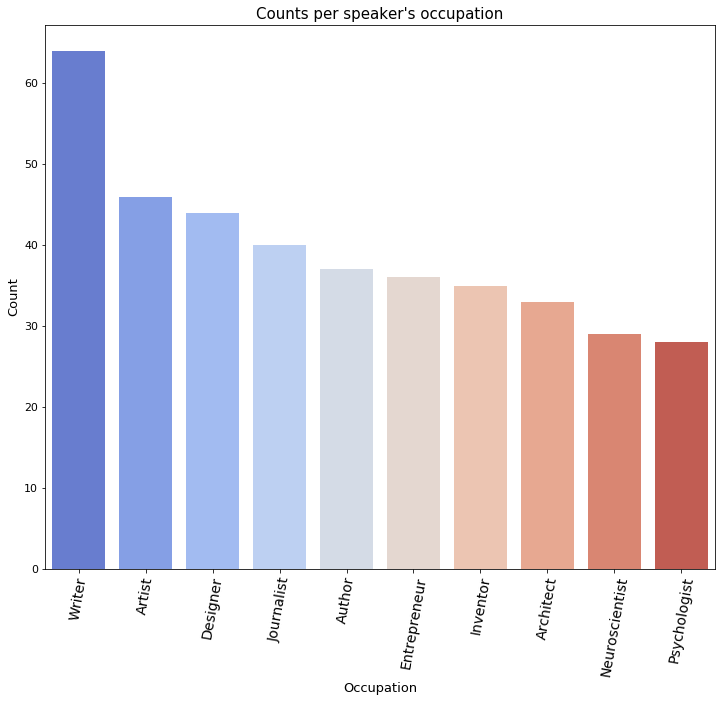

In [39]:
# plot for speaker's occupation

barplot(df.speaker_occupation.value_counts().reset_index()[:10]['index'],
        df.speaker_occupation.value_counts().reset_index()[:10]['speaker_occupation'],
       'Occupation','Count',"Counts per speaker's occupation","coolwarm")

Writters are by far the most frequent occupation. But this is awkward thinking of top tags (technology, science)!

In [40]:
# top speakers of all time based on appearances
df.main_speaker.value_counts()[:10]

Hans Rosling            9
Juan Enriquez           7
Rives                   6
Marco Tempest           6
Clay Shirky             5
Julian Treasure         5
Nicholas Negroponte     5
Bill Gates              5
Jacqueline Novogratz    5
Dan Ariely              5
Name: main_speaker, dtype: int64

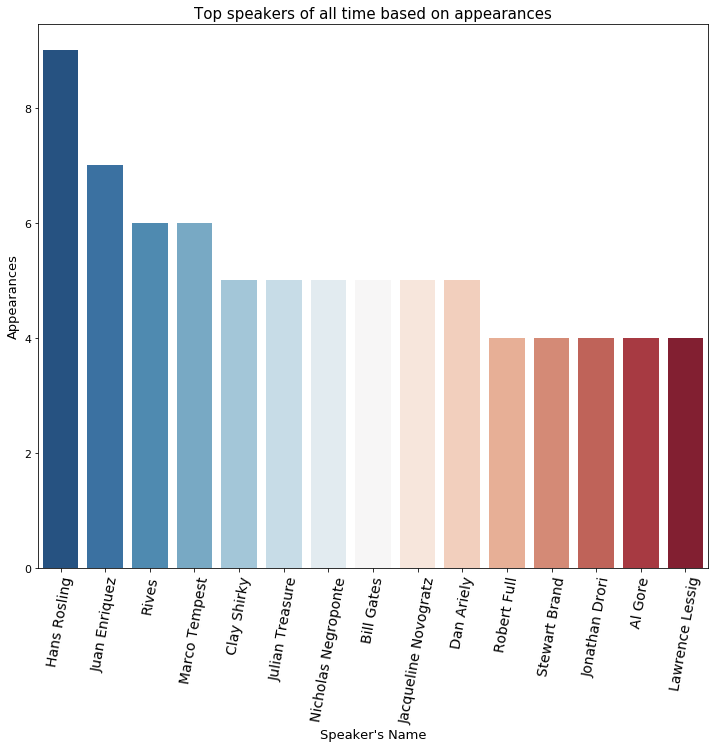

In [41]:
# Top speakers of all time based on appearances
barplot(df.main_speaker.value_counts().reset_index()[:15]['index'],
        df.main_speaker.value_counts().reset_index()[:15]['main_speaker'],
       "Speaker's Name",'Appearances','Top speakers of all time based on appearances',"RdBu_r")

In [42]:
# occupation of top speakers
for i in df.main_speaker.value_counts()[:10].reset_index()['index']:
    print(i,df.loc[df.main_speaker == i, ['speaker_occupation']].agg('max'))

Hans Rosling speaker_occupation    Global health expert; data visionary
dtype: object
Juan Enriquez speaker_occupation    Futurist
dtype: object
Rives speaker_occupation    Performance poet
dtype: object
Marco Tempest speaker_occupation    Techno-illusionist
dtype: object
Clay Shirky speaker_occupation    Social Media Theorist
dtype: object
Julian Treasure speaker_occupation    Sound consultant
dtype: object
Nicholas Negroponte speaker_occupation    Tech visionary
dtype: object
Bill Gates speaker_occupation    Philanthropist
dtype: object
Jacqueline Novogratz speaker_occupation    Investor and advocate for moral leadership
dtype: object
Dan Ariely speaker_occupation    Behavioral economist
dtype: object


### No "solists" over here...

In [43]:
# talks with more than 1 speaker
df.loc[df.num_speaker > 1,['title', 'event','num_speaker', 'main_speaker']].sort_values('num_speaker', ascending = False)

,title,event,num_speaker,main_speaker
2501,A dance to honor Mother Earth,TED2017,5,Jon Boogz and Lil Buck
2328,An interview with the founders of Black Lives ...,TEDWomen 2016,4,"Alicia Garza, Patrisse Cullors and Opal Tometi"
1540,The interspecies internet? An idea in progress,TED2013,4,"Diana Reiss, Peter Gabriel, Neil Gershenfeld a..."
2415,Political common ground in a polarized United ...,TED Dialogues,4,"Gretchen Carlson, David Brooks"
796,"""(Nothing But) Flowers"" with string quartet",TED2010,3,"David Byrne, Ethel + Thomas Dolby"
2209,My journey from Marine to actor,TED Talks Live,3,Adam Driver
2313,"""Space Oddity""",TED2016,3,"Amanda Palmer, Jherek Bischoff, Usman Riaz"
1107,Award-winning teenage science in action,TEDxWomen 2011,3,"Lauren Hodge, Shree Bose + Naomi Shah"
1965,"The dancer, the singer, the cellist ... and a ...",TED2015,3,Bill T. Jones
2099,A hilarious celebration of lifelong female fri...,TEDWomen 2015,2,Jane Fonda and Lily Tomlin


### A deeper analysis for numerical features

In [44]:
# FUNCTION for distplots

def distplot(column, title):
    fig,ax = plt.subplots(figsize = (10,10))
    sns.distplot(column)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title(title, fontsize = 15)
    return(plt.show())

def stats(column):
    return('mean:',round(column.mean(),2), 'median:', round(column.median(),2), 'std:', round(column.std(),2),
           'min:', column.min(), 'max:', column.max())

# we can simply type eg.  df.views.describe() and see the Q1 and Q3 values

**Views**

In [45]:
stats(df.views)

('mean:',
 1699779.21,
 'median:',
 1123870.5,
 'std:',
 2501042.8,
 'min:',
 50443,
 'max:',
 47227110)

The average number of views is 1.7M while median is closely to 1.2M views. Not bad for TED Talks considering thera are more than 2.5K talks to watch...

/Users/stephanosarampatzes/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


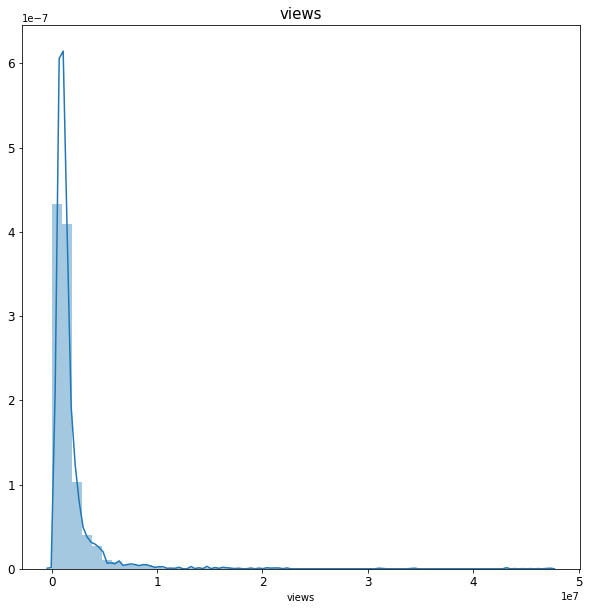

In [46]:
# distribution of views
distplot(df.views, 'views')
plt.show()

###  ! Seaborn causes the warning. Nothing to do here, seaborn patch should be released soon !

quite skewed!

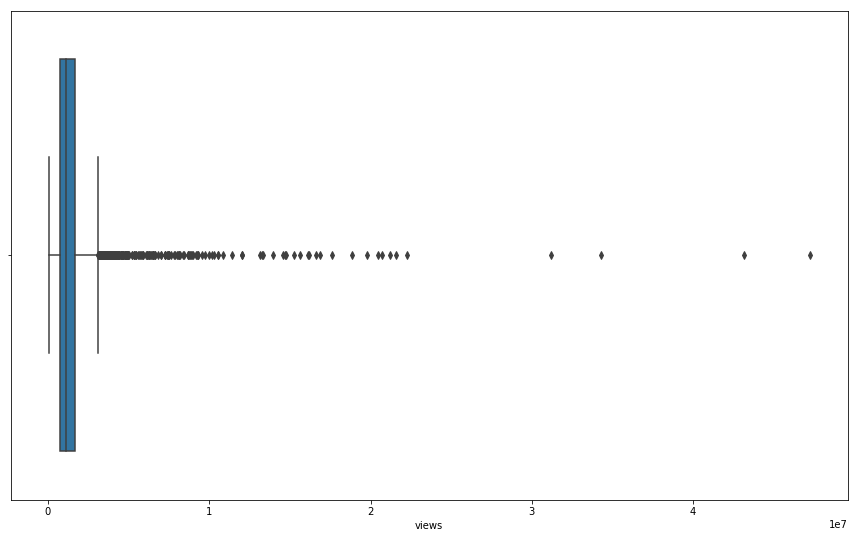

In [47]:
fig,ax = plt.subplots(figsize = (15,9))
sns.boxplot(df.views)
plt.show()

In [48]:
# talks with more than 10M views (avg =1.7M !)
df.loc[df.views > 1e07, ['title']].agg('count')

title    34
dtype: int64

We don't have outliers but extremely big numbers of views for 34 talks. 

/Users/stephanosarampatzes/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


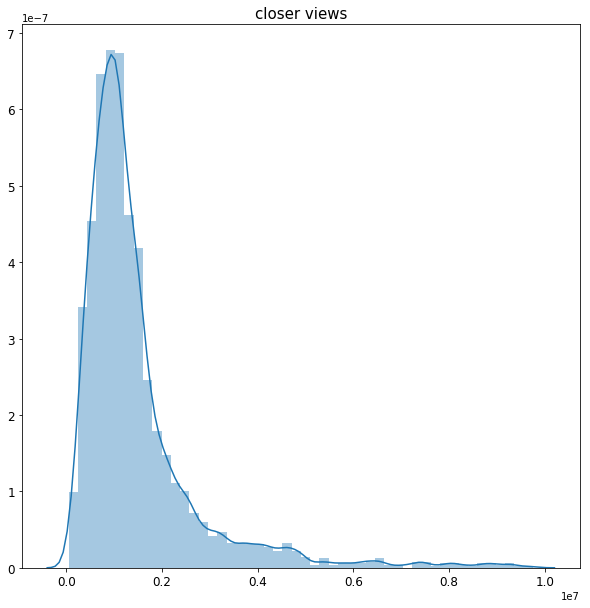

In [49]:
# views under 10M - a better insight
distplot(df.loc[df.views < 1e07, ['views']], 'closer views')

**Comments**

In [50]:
stats(df.comments)

('mean:', 191.71, 'median:', 118.0, 'std:', 282.61, 'min:', 2, 'max:', 6404)

/Users/stephanosarampatzes/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


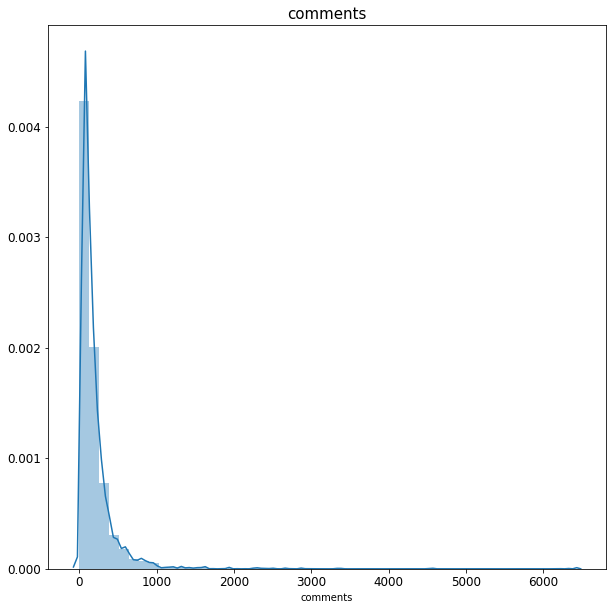

In [51]:
# Distribution of comments
distplot(df.comments, 'comments')

Skewness here too

6404 comments for Richard Dawkins's	"Militant atheism". Although, every single video has at least 2 comments!

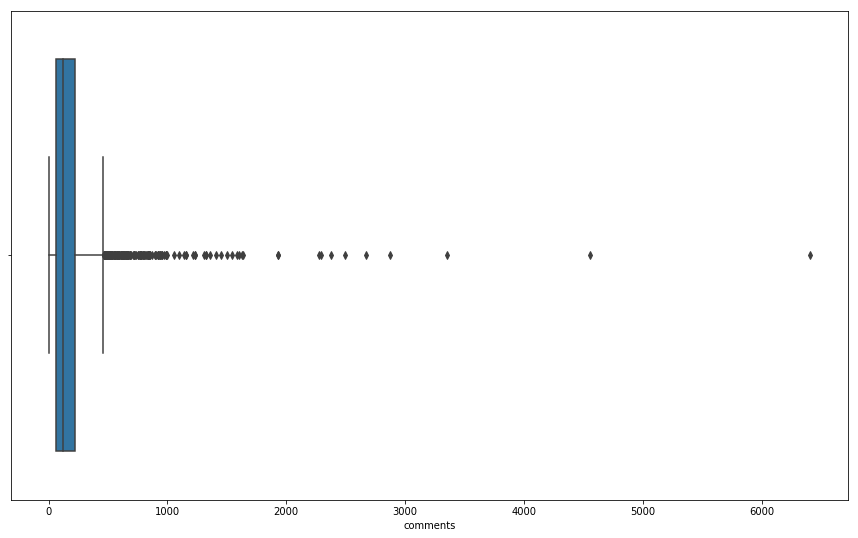

In [52]:
fig,ax = plt.subplots(figsize = (15,9))
sns.boxplot(df.comments)
plt.show()

/Users/stephanosarampatzes/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


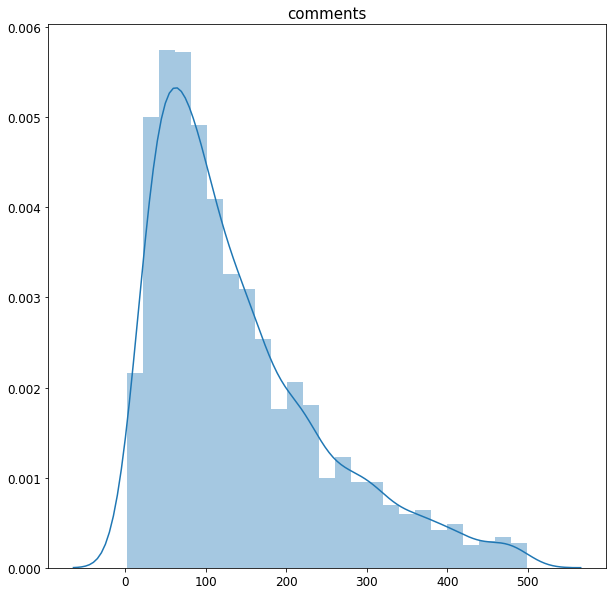

In [53]:
distplot(df.loc[df.comments < 500, ['comments']], 'comments')

**Duration**

In [54]:
stats(df.duration)
# in minutes

('mean:', 13.79, 'median:', 14.15, 'std:', 6.23, 'min:', 2.2, 'max:', 87.6)

/Users/stephanosarampatzes/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


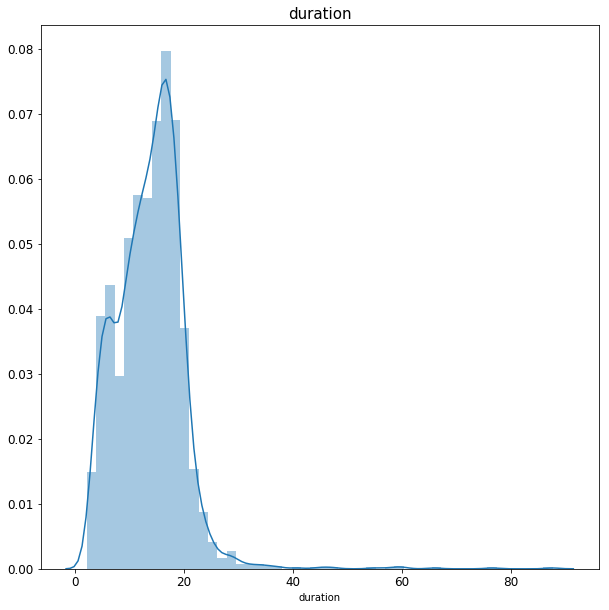

In [55]:
distplot(df.duration, 'duration')

In my opinion 15-20 minutes are enough to keep your audience engaged. Let's see a boxplot.

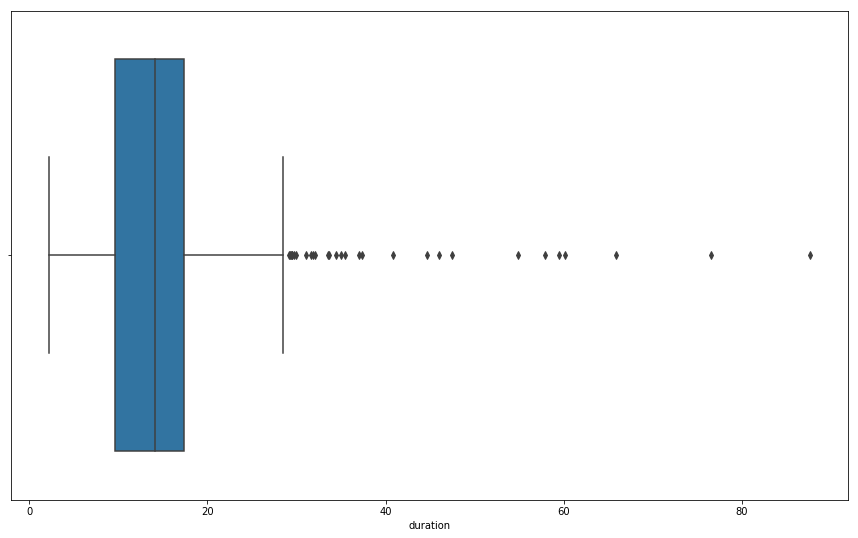

In [56]:
fig,ax = plt.subplots(figsize = (15,9))
sns.boxplot(df.duration)
plt.show()

/Users/stephanosarampatzes/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


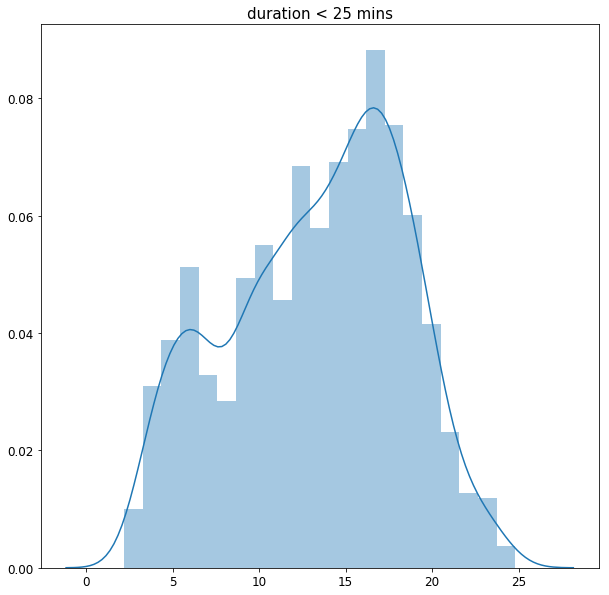

In [57]:
distplot(df.loc[df.duration < 25, ['duration']], 'duration < 25 mins')

The main volume of our data about duration, lies in the interval under 25 minutes!

**Languages**

In [58]:
stats(df.languages)

('mean:', 27.32, 'median:', 28.0, 'std:', 9.56, 'min:', 0, 'max:', 72)

Mean and median are really close so we expect to see a distribution that tends to be normal.

/Users/stephanosarampatzes/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


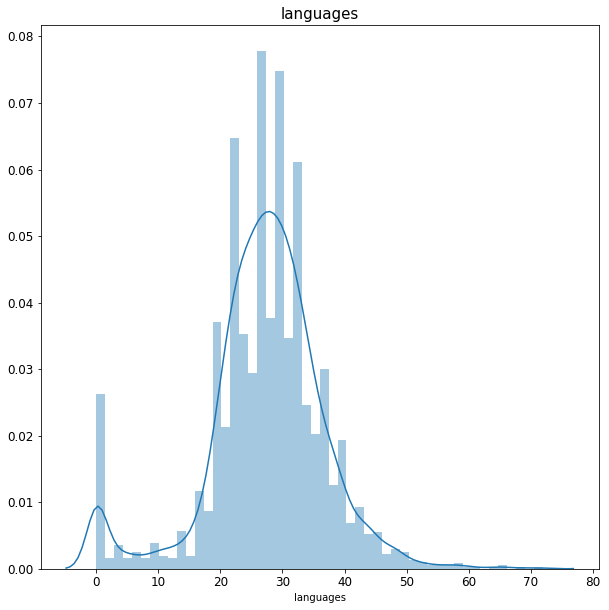

In [59]:
distplot(df.languages, 'languages')

We got a peak at the left tail. A remarkable number of talks with no translation is the reason.



### Wordcloud


Plots are based on **title** and **description** columns.

In [60]:
# import wordcloud
from wordcloud import WordCloud

# import regular expressions
import re

# punctuation
from string import punctuation

# Merge title and description
df['text'] = df.title + ' ' + df.description 

In [61]:
df.text.head()

0    Do schools kill creativity? Sir Ken Robinson m...
1    Averting the climate crisis With the same humo...
2    Simplicity sells New York Times columnist Davi...
3    Greening the ghetto In an emotionally charged ...
4    The best stats you've ever seen You've never s...
Name: text, dtype: object

In [62]:
# create corpus
words = []
for i in df.index:
    text = re.sub('[^a-zA-Z]',' ', df.text[i]).lower()
    word = [w for w in text if w not in set(list(punctuation))]
    word = ''.join(word)
    words.append(word)    

# convert list of strings to a single huge string
words = ' '.join(words)

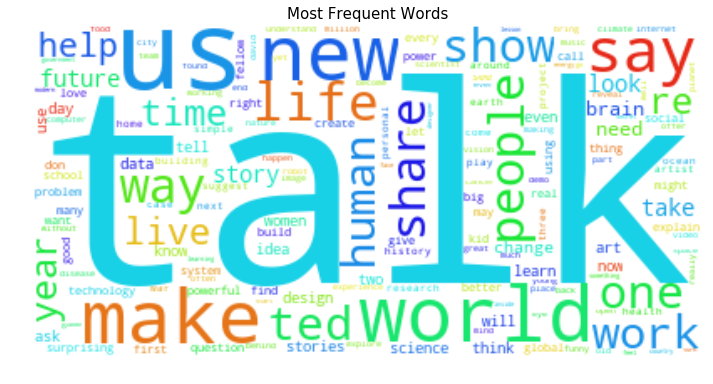

In [63]:
wordcloud = WordCloud(background_color="white").generate(words)
plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title('Most Frequent Words', fontsize = 15)
plt.axis("off")
plt.show()

Well, most common word is 'talk' and words follow after that are 'us', 'make', 'world' (a better place?  :P), 'new', 'life' and so on...

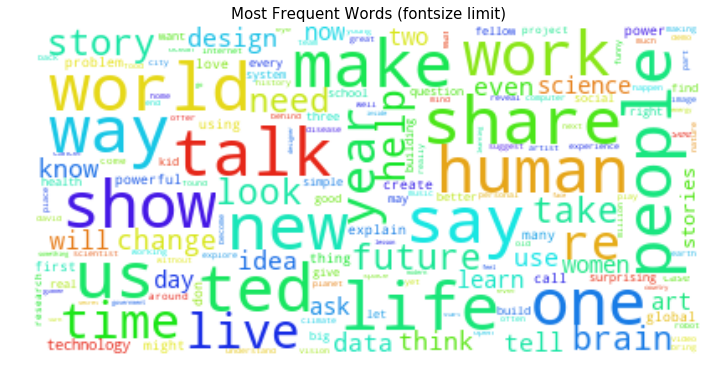

In [64]:
wordcloud = WordCloud(background_color="white",max_font_size = 40).generate(words)
plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Most Frequent Words (fontsize limit)', fontsize = 15)
plt.axis("off")
plt.show()

### Epilogue

Paraphrasing Sade's lyrics "I gave you all the information I got, I gave you more than I could give". Hope to like my point of view for this dataset. I did want me to be comprehensive and analytical and make use of all the features. 